# Exercise Session -  Support Vector Machine (SVM) SOLUTIONS

Welcome to the 6th exercise session of CS233 - Introduction to Machine Learning.  

We will use Scikit-learn, a Python package of machine learning methods, in this exercise. We are going to start with a toy binary classification example to understand Linear SVM, then to address more difficult problem. 


In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

# 1 Support Vector Machine (SVM)
SVM tries to solve linear classification problem of the **primal form**:  
    \begin{align}
       \mathbf{w}^* = \underset{\tilde{\mathbf{w}},\{\xi_n\}}{\operatorname{min}}  \ \ & \frac{1}{2}\|\tilde{\mathbf{w}}\|^2 + C \sum^N_{n=1}\xi_n \\
        \operatorname{subject \  to} \ \ &  t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) \geq 1-\xi_n , \forall \ n \\
                          &\text{and  }\  \xi_n \geq 0 , \forall \  n
    \end{align}
where, $\tilde{\mathbf{w}}$ are the weights, $x_n$ is a data sample and $t_n$ is a label.

**Q**: Why do we minimize $\tilde{\mathbf{w}}$ ? 

$\|\tilde{\mathbf{w}}\|$ is inversely related to margin width, so minimizing it means maximizing the margin, hence we minimize $\|\tilde{\mathbf{w}}\|$.

**Q**: What is C? How should we choose the best value for C?

C is penalty term, $\zeta_i$ is error in terms of how far data point is beyond correct margin and $y_i \in\{-1,1\}$ for binary classification. We choose the right value for C, given the data, through validation set.
    
**Q**: What does it mean when $\zeta_i \gt 0$ ?

As our data may not be linearly separable, hence maximizing margin will lead to some misclassifications. $\zeta_i$ is greater than zero when a data point is beyond margin and how many such data points are allowed is controlled by C. 


# 2 Find the Margins

We learn a hard-margin (i.e., no misclassification allowed) linear SVM classifier for the data samples shown in the figure below. Answer the following questions
1. What is the equation for the decision boundary, in terms of $x_1$ and $x_2$?

2. How many support vectors are there? Write down their coordinates.

3. What are the weights (including the bias term) for the SVM formulation?

4. If we learn a soft-margin (with slack variables) linear SVM classifier, then what can be the maximum and the minimum number of support vectors?

**Answer**:

1. $x_1-x_2=0$, because the decision boundary has to be perpendicular to the line joining the closest points and also divide it equally. Hence we have $x_1-x_2=0$, passing through (3,3) and the origin.

2. There are two support vectors: (4,2) and (2,4).

3. Let $w_1$, $w_2$ be the two weights and $b$ the bias. We know that (3,3) and (0,0) lie on decision boundary, so they satisfy $\mathbf{w}^T\mathbf{x} + b = 0$. That is, 
\begin{align} 
3w_1+3w_2+b &= 0 \\ 
0w_1+0w_2+b &= 0 
\end{align} 
which gives 
$w_1=-w_2$ and $b=0$. 
Now, since (4,2) and (2,4) are support vectors, we have 
\begin{align} 
4w_1+2w_2+b &= 1 \\ 
2w_1+4w_2+b &= -1 
\end{align} which gives $w_1=\frac{1}{2}$ and $w_2=-\frac{1}{2}$.
 
4. We have a maximum of 4, as all data points can be support vectors when C is very small, and a minimum of 2.

Extra comments: Some of you proposed questions related to the soft margin and support vectors during the exercise class. To fully answer all questions, you might spend some time and quickly go through the full derivation of solving the SVM, e.g. https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/ .

Take-away points: for soft margin SVMs, support vectors are data points on and within the margins. The size of margin is controlled by C: small values of C will result in a wider margin, at the cost of some misclassifications; large values of C will give you the Hard Margin classifier and tolerates zero constraint violation. If the support vectors change, the decision boundary and the value of W are very likely to change as well.
 


<img src="svm_full_text.png" width="500">

# 3 Scikit-Learn

Training a SVM classifer is not a easy task, so in this session, we are going to use Scikit-Learn, which is a machine learning library written in python. Most of the machine learning algorithms and tools are already implemented. In this exercise, we'll use this package to train and understand SVM. If you are interested in how to optimize a SVM, you can refer to [this](https://xavierbourretsicotte.github.io/SVM_implementation.html).

Please install scikit-learn in your conda environment by following instructions at this link:https://scikit-learn.org/stable/install.html if you don't have it.

Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html

All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with the data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for simple example.

We will explore linear SVM in this session: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) with linear kernel. 

# 4 Binary Classification

Let's begin with a simple **binary** classification using Linear SVM.
The data is simply **linearly** separable.

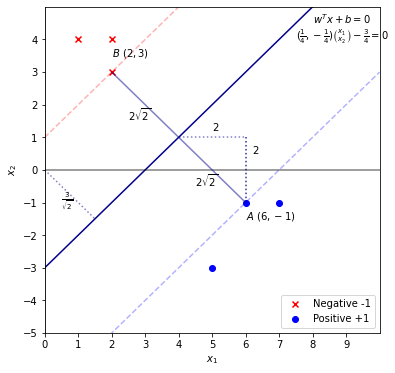

In [2]:
# Simple data
from plots import plot_simple_data
x = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])
plot_simple_data()

### 4.1 Linear SVM
In this part, you are asked to build a SVM classifier using SVC and to understand the outputs from the fitted model.

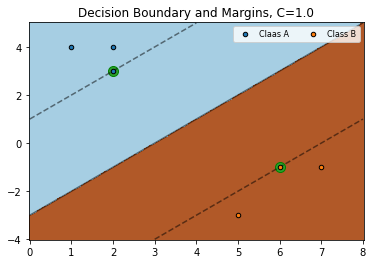

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]


In [3]:
# Let use SVC with linear kernel
from sklearn.svm import SVC
from plots import plot

## CODE HERE
# 1. Declare a SVC with C=1.0 and kernel='linear'
clf = SVC(C = 1.0, kernel = 'linear')

# 2. use x and y to fit the model
clf.fit(x, y) 

# 3. show the fitted model
plot(x, y, clf)

print('w = ',clf.coef_)
print('w0 = ',clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.distances = np.linalg.norm(X-labels*centers)
Avg_dist = np.mean(distances)np)
print('Indices of support vectors = ', clf.support_)

In this case, we found that we have 2 **support vectors**, one in each class. They are shown highlighed in green in the plot. A support vector is a data sample that is either on the margin or within the margin. 

Let's inspect the result of the classification. We do the classification in the following way:

$$ 
t_i = \begin{cases}
-1 & \mathbf{x}_i^T \mathbf{w} + w_0 < 0\\
1 & \text{otherwise}
\end{cases}
$$

In [4]:
# Use the weights (w) from the fitted model to predict the labels of input data points

def raw_predict(x, w, w0):
    '''
    given input data, w and w0, output the prediction result
    
    input:
    x: data, np.array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
    w: weights, np.array of shape (D,)
    w0: bias, np.array of shape (1,)
    
    output:
    out: predictions, np.array of shape (N, ). tip: .astype(int) 
    '''
    ## CODE HERE
    out = np.sign(np.dot(x, w) + w0).astype(int)
    return out

x_test = np.array([
    [4, 2],
    [ 6, -3]])

raw_pred = raw_predict(x_test, clf.coef_[0], clf.intercept_)
print("Prediction from your implementation: ", raw_pred)

##CODE HERE. Use scikit-learn's predict function to do the prediction on the test data.
model_predict = clf.predict(x_test)

print("Prediction from the model: ", model_predict)


assert(raw_pred.all() == clf.predict(x_test).all())


Prediction from your implementation:  [-1  1]
Prediction from the model:  [-1  1]


Now, let us determine the indices of the support vectors. (Reminder: These are the data samples that fall on the margin or within the margin). 

In [ ]:
## we can also calculate the decision function manually
## Step 1: CODE HERE:: Code the decision function: Xw+w_0
decision_function = np.dot(x, clf.coef_[0]) + clf.intercept_

## Step 2: We can also retrieve the decision function from the model:
decision_function_from_model = clf.decision_function(x)

assert(decision_function_from_model.all() == decision_function.all())

## according to the condition that support vectors should satisfy
## CODE HERE tips: use np.where to put the condition in.
support_vector_indices = np.where(y * decision_function <= 1.)[0]


print('I find the indices of support vectors = ', support_vector_indices)
assert(support_vector_indices.all() == clf.support_.all())


### 4.2 Different C values
Let's try different values of C. In the code, vary the C value from 0.001 to 100 and notice the changes on a bigger dataset.  
**Question**: How does the margin vary with C? **Hint**: have a look at the optimization formulation above.

**Answer**: Lower C allows more misclassification and hence larger margin, while bigger C reduces misclassfication and hence smaller margin.

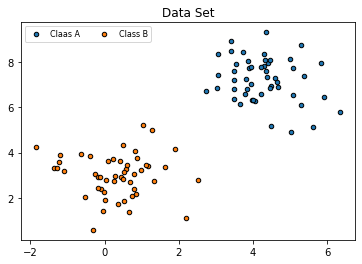

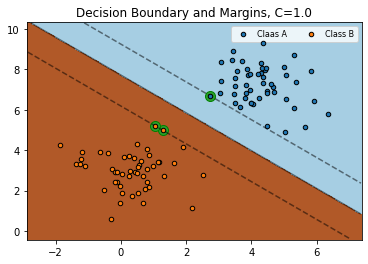

In [6]:
from sklearn.svm import SVC
from helpers import get_simple_dataset
from plots import plot

# Get the simple dataset
X, Y = get_simple_dataset()
plot(X,Y,None,dataOnly=True)

#Declare a SVM model with linear kernel and C=1.0
clf = SVC(kernel='linear', C=1.0)

#call the fit method
clf.fit(X, Y)

#plot the decision boundary
plot(X, Y, clf)


The above plot shows the decision boundary and margins of the learnt model. Encircled points are the support vectors.  
WARNING: if the margins go beyound the limits of axis, they are not shown or shown close to decision plane. 

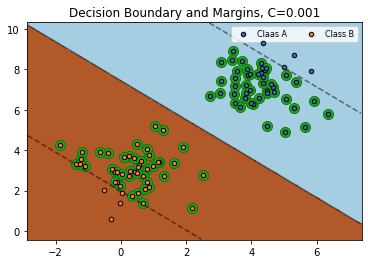

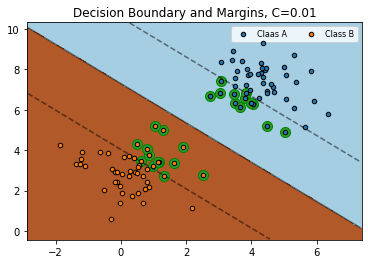

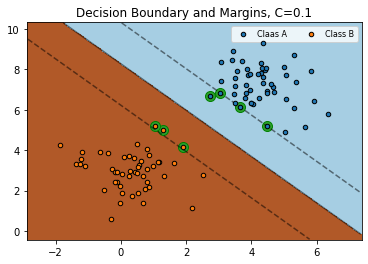

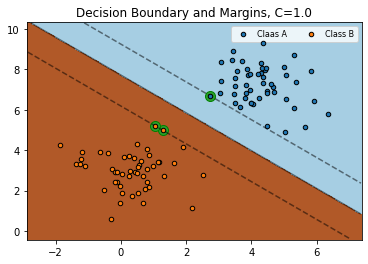

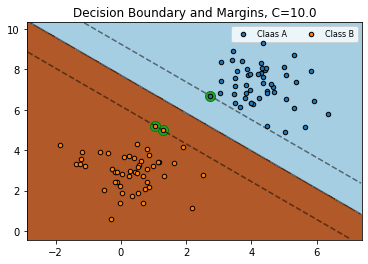

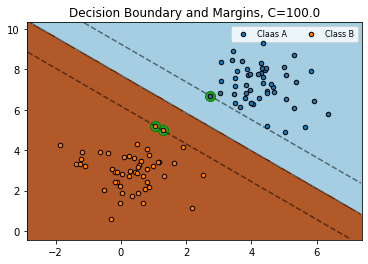

In [7]:
# CODE HERE #
# Vary C and plot the boundaries
# Use np.logspace to generate 6 C values of range (10e-3, 10e2) 

C = np.logspace(-3,2,6)
for c in C:
    #Get SVM model with linear kernel 
    clf = SVC(kernel='linear', C=c)

    #call the fit method
    clf.fit(X, Y)

    #plot the decision boundary
    plot(X, Y, clf)


### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)